<a href="https://colab.research.google.com/github/AntoniCrous/Aprndizaje_No_Supervisado-Trabajo/blob/master/Agrupamiento_Modelos_Probabilisticos_Ag5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agrupamiento basado en Modelos Probabilisticos: Mixtura de Gaussianas

Este algoritmo se basa en mediante la superposicion de varias distribuciones gaussianas (de distintas desviaciones e medias) intenta ajustarse a las distrubuciones de cada atributo. Definiendo asi para cada distribucion gausiana un clúster.

In [0]:
#Cargamos las librerias necessarias
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt

##Dataset 1 Conocido

El dataset 1 el qual conocemos las classes tiene 1999 instancias.
1999
3998


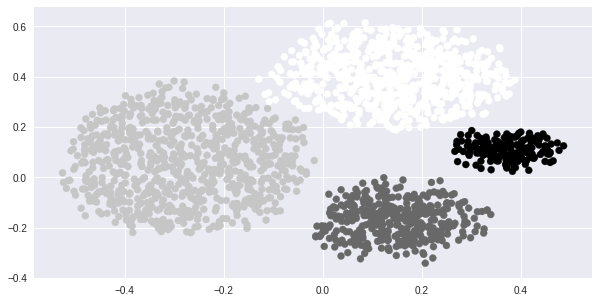

In [19]:
#Cargamos y Mostramos el dataset 1
data_file_url = 'https://raw.githubusercontent.com/jhernandezgonzalez/unsupervisedlearning/master/datasets/sinteticos/dataset_cuatro_diferente_medida.csv'
D1 = np.array(pd.read_csv(data_file_url,header=0))
D1 = D1[ np.random.choice(np.arange(D1.shape[0]), D1.shape[0], replace=False) ,:]
D1x = D1[:,0:2]
D1y = D1[:,2]
print('El dataset 1 el qual conocemos las classes tiene',D1y.size,'instancias.')

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(D1x[:,0],D1x[:,1], c=D1y)
print(D1y.size)
print(D1x.size)

#### Conocido
Como conocemos el numero de classes assignamos k = 4

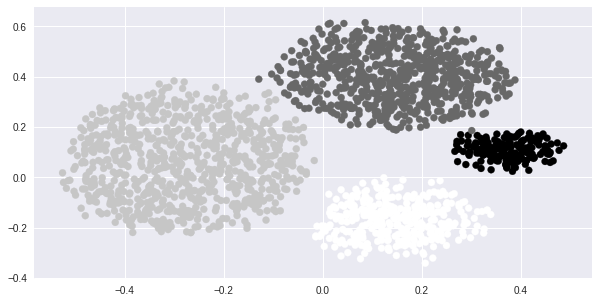

In [20]:
from sklearn.mixture import GaussianMixture

# Se inicializa el método con el número de clústeres (componentes) a buscar
modelo = GaussianMixture(n_components = 4, max_iter = 200)
# Se aprende el modelo
modelo = modelo.fit(D1x)
# Se predicen las asignaciones a clústeres
D1yp_sk = modelo.predict(D1x)

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(D1x[:,0],D1x[:,1], c=D1yp_sk)

## Conclusiones
Puesto que conocemos el dataset vemos que se adapta muy bien al dataset puesto que se puede ver a simple vista una especie de distrubución gaussiana en cada clúster.

##Dataset 2  No Conocido

El dataset 2 el qual conocemos las classes tiene 2000 instancias.


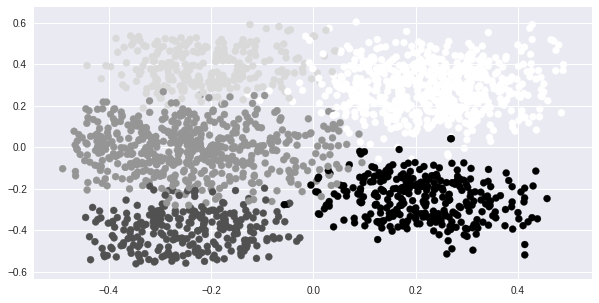

In [8]:
#Cargamos y Mostramos el dataset 2
data_file_url = 'https://raw.githubusercontent.com/jhernandezgonzalez/unsupervisedlearning/master/datasets/sinteticos/dataset_inseparable.csv'
D2 = np.array(pd.read_csv(data_file_url,header=0))
D2 = D2[ np.random.choice(np.arange(D2.shape[0]), D2.shape[0], replace=False) ,:]
D2x = D2[:,0:2]
D2y = D2[:,2]
print('El dataset 2 el qual conocemos las classes tiene',D2y.size,'instancias.')

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(D2x[:,0],D2x[:,1], c=D2y)

#### Dataset No Conocido
Como no conocemos el numero de clusters debemos usar metricas para encontrar el numero de k que maximize la dispersión iterclúster y minimize la dispersión intraclúster.

Text(0, 0.5, 'Medida de Calinski_harabaz')

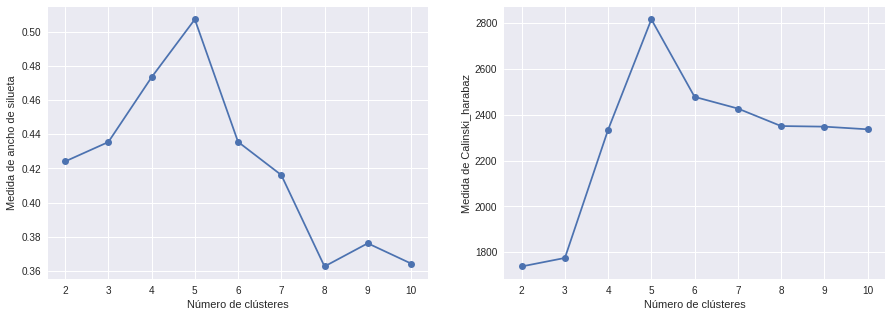

In [15]:
from sklearn.metrics import silhouette_score,calinski_harabaz_score

rsilueta = np.zeros(9)
calinski = np.zeros(9)
for k in np.arange(2,11):
    from sklearn.mixture import GaussianMixture

    # Se inicializa el método con el número de clústeres (componentes) a buscar
    modelo = GaussianMixture(n_components = k, max_iter = 200)
    # Se aprende el modelo
    modelo = modelo.fit(D2x)
    # Se predicen las asignaciones a clústeres
    D2yp_sk = modelo.predict(D2x)
    
    rsilueta[k-2] = silhouette_score(D2x, D2yp_sk)
    calinski[k-2] = calinski_harabaz_score(D2x, D2yp_sk)
    
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot( np.arange(2,11),rsilueta, linestyle='-', marker='o')
ax[0].set_xlabel("Número de clústeres")
ax[0].set_ylabel("Medida de ancho de silueta")

ax[1].plot( np.arange(2,11),calinski, linestyle='-', marker='o')
ax[1].set_xlabel("Número de clústeres")
ax[1].set_ylabel("Medida de Calinski_harabaz")

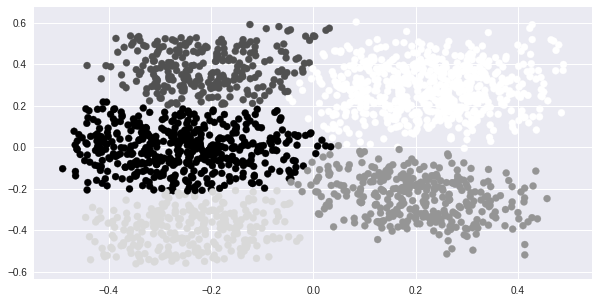

In [17]:
from sklearn.mixture import GaussianMixture

# Se inicializa el método con el número de clústeres (componentes) a buscar
modelo = GaussianMixture(n_components = 5, max_iter = 200)
# Se aprende el modelo
modelo = modelo.fit(D2x)
# Se predicen las asignaciones a clústeres
D2yp_sk = modelo.predict(D2x)

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(D2x[:,0],D2x[:,1], c=D2yp_sk)

## Conclusiones
Puesto que no conocemos el dataset no podemos decir que es el agrupamiento correcto sin embargo parece un comportamiento bastante adequado ya que separa las aglomeraciones mas densas.